In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

# Encode
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot

# ML
from sklearn.tree import DecisionTreeClassifier

# Ensemble method
from sklearn.ensemble import RandomForestClassifier

# Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

# Metric to evaluation
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix

# Standard scaler
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

from functools import reduce
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.model_selection import permutation_test_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA


In [4]:
df_join = pd.read_csv("df_join.csv")
df_join = df_join.drop(columns='Unnamed: 0', axis=1)

# Creat X and y
y = df_join['SEVERITYCODE'].astype('object')
y = y.to_frame()
X = df_join.drop('SEVERITYCODE', axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Resampling
df_train = pd.merge(X_train, y_train, left_index=True, right_index=True)
df_majority = df_train[df_train.SEVERITYCODE == "1"]
df_2 = df_train[df_train.SEVERITYCODE == "2"]
df_2b = df_train[df_train.SEVERITYCODE == "2b"]
df_3 = df_train[df_train.SEVERITYCODE == "3"]

# Upsample minority class
df_majority_upsampled = resample(df_majority, replace=True, n_samples=231, random_state=123)
df_2_upsampled = resample(df_2, replace=True, n_samples=231, random_state=123)
df_2b_upsampled = resample(df_2b, replace=True, n_samples=231, random_state=123)
# df_3_upsampled = resample(df_3, replace=True, n_samples=231, random_state=123)

# Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority_upsampled, df_2_upsampled, df_2b_upsampled, df_3_upsampled])
df_upsampled = pd.concat([df_majority_upsampled, df_2_upsampled, df_2b_upsampled, df_3])

# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

# Upsample X_train and y_train
y_upsample = df_upsampled['SEVERITYCODE'].astype('object')
X_upsample = df_upsampled.drop('SEVERITYCODE', axis=1)

X_upsample = X_upsample.reset_index()
X_upsample = X_upsample.drop(columns='index', axis=1)
y_upsample = y_upsample.reset_index()
y_upsample = y_upsample.drop(columns='index', axis=1)


In [7]:
X_upsample = X_upsample[['PEDCYLCOUNT', 'UNDERINFL', 'COLLISIONTYPE7', 'max', 'VEHCOUNT', 'SPEEDING']]

In [14]:
pca = PCA(n_components=2)
X = pca.fit_transform(X_upsample)
principalDf = pd.DataFrame(data=X, columns=['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y_upsample[['SEVERITYCODE']]], axis=1)

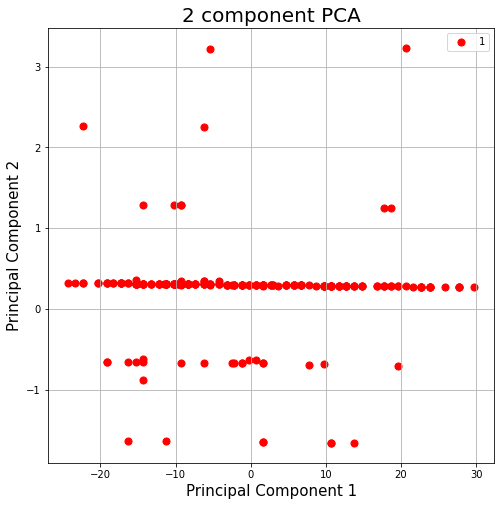

In [9]:
finalDf_1 = finalDf[finalDf['SEVERITYCODE']=='1']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['1']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_1['SEVERITYCODE'] == target
    ax.scatter(
        finalDf_1.loc[indicesToKeep, 'principal component 1'],
        finalDf_1.loc[indicesToKeep, 'principal component 2'],
        c=color, s=50)
ax.legend(targets)
ax.grid()

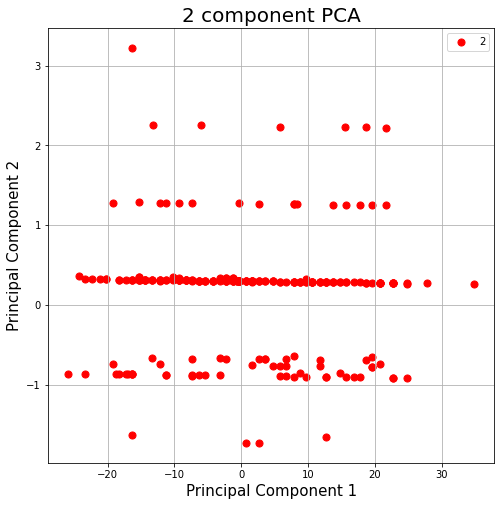

In [10]:
finalDf_2 = finalDf[finalDf['SEVERITYCODE']=='2']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['2']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_2['SEVERITYCODE'] == target
    ax.scatter(
        finalDf_2.loc[indicesToKeep, 'principal component 1'],
        finalDf_2.loc[indicesToKeep, 'principal component 2'],
        c=color, s=50)
ax.legend(targets)
ax.grid()

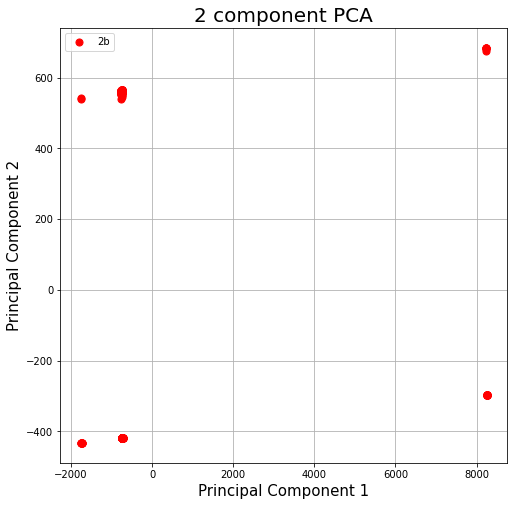

In [24]:
finalDf_2b = finalDf[finalDf['SEVERITYCODE']=='2b']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['2b']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_2b['SEVERITYCODE'] == target
    ax.scatter(
        finalDf_2b.loc[indicesToKeep, 'principal component 1'],
        finalDf_2b.loc[indicesToKeep, 'principal component 2'],
        c=color, s=50)
ax.legend(targets)
ax.grid()

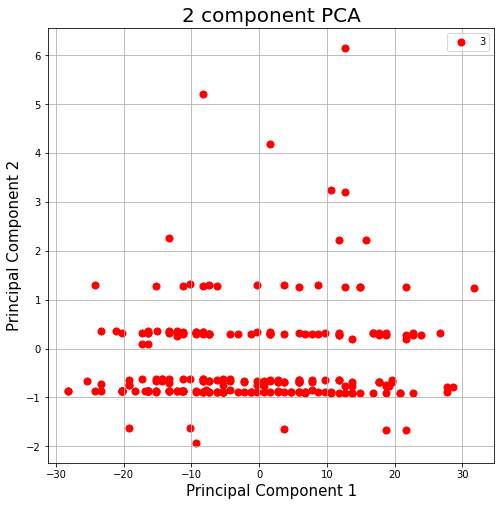

In [15]:
finalDf_3 = finalDf[finalDf['SEVERITYCODE']=='3']
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['3']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf_3['SEVERITYCODE'] == target
    ax.scatter(
        finalDf_3.loc[indicesToKeep, 'principal component 1'],
        finalDf_3.loc[indicesToKeep, 'principal component 2'],
        c=color, s=50)
ax.legend(targets)
ax.grid()

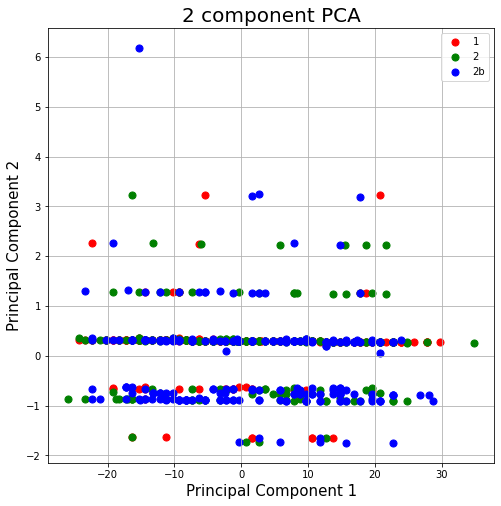

In [18]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)
targets = ['1', '2', '2b', '3']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['SEVERITYCODE'] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, 'principal component 1'],
        finalDf.loc[indicesToKeep, 'principal component 2'],
        c=color, s=50)
ax.legend(targets)
ax.grid()

In [17]:
finalDf['SEVERITYCODE'].value_counts()

2     231
3     231
2b    231
1     231
Name: SEVERITYCODE, dtype: int64